1. Introduction

Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market[1].

The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps.

The dataset you will use here was scraped from Google Play Store in September 2018 and was published on Kaggle. Here are the details:

## datasets/apps.csv
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
App: Name of the app

Category: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
Rating: The current average rating (out of 5) of the app on Google Play
Reviews: Number of user reviews given on the app
Size: Size of the app in MB (megabytes)
Installs: Number of times the app was downloaded from Google Play
Type: Whether the app is paid or free
Price: Price of the app in US$

Last Updated: Date on which the app was last updated on Google Play
datasets/user_reviews.csv
This file contains a random sample of 100 [most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/) user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
App: Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file
Review: The pre-processed user review text
Sentiment Category: Sentiment category of the user review - Positive, Negative or Neutral
Sentiment Score: Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.

In [3]:
# Import pandas Library
import pandas as pd

In [4]:
#Read the CSV file and display it's few rows
apps = pd.read_csv("C:/Users/Debbie/Documents/Google Play Apps Dataset/apps.csv")
pd.DataFrame(apps)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors="coerce").fillna(0).astype(int).to_frame()
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,0,Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,0,Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,0,Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,0,Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,0,Free,0.0,"June 20, 2018"


In [5]:
# Subset the Columns
app_category_info = apps[["Category"]]
app_category_info["Number of apps"] = apps[["App"]]
app_category_info["Average price"] = apps[["Price"]]
app_category_info["Average rating"] = apps[["Rating"]]
app_category_info = app_category_info.groupby('Category').agg({'Number of apps':'count', 'Average price':'mean', 'Average rating':'mean' })
app_category_info

C:\Users\Debbie\AppData\Local\Temp\ipykernel_2692\3884797460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_category_info["Number of apps"] = apps[["App"]]
C:\Users\Debbie\AppData\Local\Temp\ipykernel_2692\3884797460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_category_info["Average price"] = apps[["Price"]]
C:\Users\Debbie\AppData\Local\Temp\ipykernel_2692\3884797460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Number of apps,Average price,Average rating
Category,,,
ART_AND_DESIGN,64,0.093281,4.357377
AUTO_AND_VEHICLES,85,0.158471,4.190411
BEAUTY,53,0.000000,4.278571
BOOKS_AND_REFERENCE,222,0.539505,4.344970
BUSINESS,420,0.417357,4.098479
COMICS,56,0.000000,4.181481
COMMUNICATION,315,0.263937,4.121484
DATING,171,0.160468,3.970149
EDUCATION,119,0.150924,4.364407


In [6]:
#Read the Reviewas CSV file 
reviews = pd.read_csv("C:/Users/Debbie/Documents/Google Play Apps Dataset/user_reviews.csv")
reviews

,App,Review,Sentiment Category,Sentiment Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00
...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN


In [7]:
# Subset FINANCE row from Category
finance = apps[apps["Category"] == "FINANCE"]
finance.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
837,K PLUS,FINANCE,4.4,124424,NaN,0,Free,0.0,"June 26, 2018"
838,ING Banking,FINANCE,4.4,39041,NaN,0,Free,0.0,"August 3, 2018"
839,Citibanamex Movil,FINANCE,3.6,52306,42.0,0,Free,0.0,"July 27, 2018"
840,The postal bank,FINANCE,3.7,36718,NaN,0,Free,0.0,"July 16, 2018"
841,KTB Netbank,FINANCE,3.8,42644,19.0,0,Free,0.0,"June 28, 2018"


In [8]:
# Subset type 'free' from type column
free_finance = finance[finance["Type"] == "Free"]
free_finance.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
837,K PLUS,FINANCE,4.4,124424,NaN,0,Free,0.0,"June 26, 2018"
838,ING Banking,FINANCE,4.4,39041,NaN,0,Free,0.0,"August 3, 2018"
839,Citibanamex Movil,FINANCE,3.6,52306,42.0,0,Free,0.0,"July 27, 2018"
840,The postal bank,FINANCE,3.7,36718,NaN,0,Free,0.0,"July 16, 2018"
841,KTB Netbank,FINANCE,3.8,42644,19.0,0,Free,0.0,"June 28, 2018"


In [9]:
#Join the column reviews on the App column in free_finance dataframe
merged_df = pd.merge(free_finance, reviews, on= "App")
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Review,Sentiment Category,Sentiment Score
0,Citibanamex Movil,FINANCE,3.6,52306,42.0,0,Free,0.0,"July 27, 2018","Forget paying app, designed make fail payments...",Negative,-0.500000
1,Citibanamex Movil,FINANCE,3.6,52306,42.0,0,Free,0.0,"July 27, 2018","It's working expected, talking best bank Mexic...",Positive,0.400000
2,Citibanamex Movil,FINANCE,3.6,52306,42.0,0,Free,0.0,"July 27, 2018",It has many problems with Android 8.1. You can...,Positive,0.250000
3,Citibanamex Movil,FINANCE,3.6,52306,42.0,0,Free,0.0,"July 27, 2018","I changed my phone to a Xiaomi Redmi Note 5, t...",Positive,0.175000
4,Citibanamex Movil,FINANCE,3.6,52306,42.0,0,Free,0.0,"July 27, 2018",In her eagerness to make her look pretty with ...,Negative,-0.158333
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,Fortune City - A Finance App,FINANCE,4.6,49275,91.0,0,Free,0.0,"July 17, 2018",NaN,NaN,NaN
2196,Fortune City - A Finance App,FINANCE,4.6,49275,91.0,0,Free,0.0,"July 17, 2018",NaN,NaN,NaN
2197,Fortune City - A Finance App,FINANCE,4.6,49275,91.0,0,Free,0.0,"July 17, 2018",NaN,NaN,NaN
2198,Fortune City - A Finance App,FINANCE,4.6,49275,91.0,0,Free,0.0,"July 17, 2018",NaN,NaN,NaN


In [10]:
# merge column App with Column Sentiment Score and find the mean of Sentiment Score
sentiment_df = merged_df.groupby("App").agg({'Sentiment Score': 'mean'})
sentiment_df

,Sentiment Score
App,
A+ Mobile,0.329592
ACE Elite,0.252171
Acorns - Invest Spare Change,0.046667
Amex Mobile,0.175666
Associated Credit Union Mobile,0.388093
BBVA Compass Banking,0.205590
BBVA Spain,0.515086
BZWBK24 mobile,0.326883
Bank of America Mobile Banking,0.180027


In [11]:
#Sort the Sentiment score in descending order and assign to top_10_user_feedback
top_10_user_feedback = sentiment_df.sort_values(by = "Sentiment Score", ascending = False)
top_10_user_feedback.head()

,Sentiment Score
App,
BBVA Spain,0.515086
Associated Credit Union Mobile,0.388093
BankMobile Vibe App,0.353455
A+ Mobile,0.329592
Current debit card and app made for teens,0.327258


In [12]:
#Select the top 10 by slicing
top_10_user_feedback = top_10_user_feedback[:10]
top_10_user_feedback

,Sentiment Score
App,
BBVA Spain,0.515086
Associated Credit Union Mobile,0.388093
BankMobile Vibe App,0.353455
A+ Mobile,0.329592
Current debit card and app made for teens,0.327258
BZWBK24 mobile,0.326883
"Even - organize your money, get paid early",0.283929
Credit Karma,0.270052
Fortune City - A Finance App,0.266966


array([[<AxesSubplot:title={'center':'Sentiment Score'}>]], dtype=object)

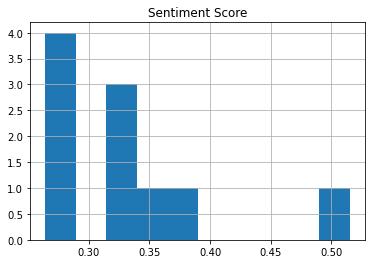

In [13]:
import matplotlib.pyplot as plt
top_10_user_feedback.hist()